In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
# Importing the dataset
squid_data=pd.read_excel('new_allsquid.xlsx')
#target = 'target'
squid_data.tail()

,Unnamed: 0,date,username,tweet,language,hashtags,near,cleaned_tweet,polarity,subjectivity,Sentiment
21468,22060,2022-10-22 08:16:29,yhebethuna,Nope It's 3rd best BBN and influencers party...,en,[],Cape town,nope it rd best bbn and influencers party af...,0.24,0.356667,Positive
21469,22061,2022-09-15 11:56:25,nathanstitus,"@TasAda123 When I did watch, I really enjoyed ...",en,[],Cape town,when i did watch i really enjoyed narcos stran...,0.20,0.650000,Positive
21470,22062,2022-08-27 17:35:43,omoiyaakeem,This is some intense Squid game 🥹BBNaija,en,[],Cape town,this is some intense squid game bbnaija,-0.10,0.700000,Negative
21471,22063,2022-07-10 12:36:04,Matt_Maekela,Loved it so much didn't wanna finish reading i...,en,"['allagainstall', 'nathanallen', 'squidgame']",Cape town,loved it so much didnt wanna finish reading it...,0.45,0.500000,Positive
21472,22064,2022-06-20 17:34:53,Ke_Arturo,Who's attending Squid game? https://t.co/6JiS...,en,[],Cape town,who attending squid game,-0.40,0.400000,Negative


In [3]:
squid_data.shape

(21473, 11)

In [4]:
squid_data.near.unique()

array(['Essex', 'Newcastle', 'London', 'Portsmouth', 'Leicestershire',
       'Kent', 'Cardiff', 'Glasgow', 'New York', 'Los Angeles', 'Chicago',
       'Phoenix', 'Philadelphia', 'Dallas', 'San Diego', 'San Jose',
       'San Antonio', 'Calif', 'Paris', 'Lisbon', 'Amsterdam', 'Florence',
       'Vienna', 'Berlin', 'Dublin', 'Hong Kong', 'Mubai', 'Seoul',
       'Manila', 'Lagos', 'Abuja', 'Cape town'], dtype=object)

In [5]:
import datetime
squid_data['new_date']=pd.to_datetime(squid_data['date']).dt.date
squid_data

,Unnamed: 0,date,username,tweet,language,hashtags,near,cleaned_tweet,polarity,subjectivity,Sentiment,new_date
0,0,2023-04-14 14:58:58,kevinmatt123,Did y’all even watch the damn show???? They de...,en,[],Essex,did yall even watch the damn show they definit...,-0.010000,0.290000,Negative,2023-04-14
1,1,2023-04-12 14:38:32,HolliFriedland,Is your website feeling a bit outdated? Updati...,en,"['socialsquids', 'websitedesign', 'webdevelopm...",Essex,is your website feeling a bit outdated updatin...,-0.400000,0.516667,Negative,2023-04-12
2,2,2023-04-12 11:44:46,bevcut,"@Cornet_Szn Squid games, red rose, dead to me",en,[],Essex,squid games red rose dead to me,0.133333,0.450000,Positive,2023-04-12
3,3,2023-04-10 14:56:55,PinataPsychic,this game fucking sucks because they put in tw...,en,[],Essex,this game fucking sucks because they put in tw...,-0.245000,0.555000,Negative,2023-04-10
4,4,2023-04-09 04:13:13,epicrell,yo….where tf is this squid games season?,en,[],Essex,yowhere tf is this squid games season,0.000000,0.000000,Neutral,2023-04-09
...,...,...,...,...,...,...,...,...,...,...,...,...
21468,22060,2022-10-22 08:16:29,yhebethuna,Nope It's 3rd best BBN and influencers party...,en,[],Cape town,nope it rd best bbn and influencers party af...,0.240000,0.356667,Positive,2022-10-22
21469,22061,2022-09-15 11:56:25,nathanstitus,"@TasAda123 When I did watch, I really enjoyed ...",en,[],Cape town,when i did watch i really enjoyed narcos stran...,0.200000,0.650000,Positive,2022-09-15
21470,22062,2022-08-27 17:35:43,omoiyaakeem,This is some intense Squid game 🥹BBNaija,en,[],Cape town,this is some intense squid game bbnaija,-0.100000,0.700000,Negative,2022-08-27
21471,22063,2022-07-10 12:36:04,Matt_Maekela,Loved it so much didn't wanna finish reading i...,en,"['allagainstall', 'nathanallen', 'squidgame']",Cape town,loved it so much didnt wanna finish reading it...,0.450000,0.500000,Positive,2022-07-10


In [6]:
pip install langdetect

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 23.0.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
# if datetime_utc is a column
squid_data['date'] = pd.to_datetime(squid_data['date'])  # <-- omit if datetime_utc is already datetime64[ns]
squid_data[['year', 'month', 'day','time']] = squid_data['date'].apply(lambda x: x.timetuple()[:4]).tolist()


In [8]:
squid_data

,Unnamed: 0,date,username,tweet,language,hashtags,near,cleaned_tweet,polarity,subjectivity,Sentiment,new_date,year,month,day,time
0,0,2023-04-14 14:58:58,kevinmatt123,Did y’all even watch the damn show???? They de...,en,[],Essex,did yall even watch the damn show they definit...,-0.010000,0.290000,Negative,2023-04-14,2023,4,14,14
1,1,2023-04-12 14:38:32,HolliFriedland,Is your website feeling a bit outdated? Updati...,en,"['socialsquids', 'websitedesign', 'webdevelopm...",Essex,is your website feeling a bit outdated updatin...,-0.400000,0.516667,Negative,2023-04-12,2023,4,12,14
2,2,2023-04-12 11:44:46,bevcut,"@Cornet_Szn Squid games, red rose, dead to me",en,[],Essex,squid games red rose dead to me,0.133333,0.450000,Positive,2023-04-12,2023,4,12,11
3,3,2023-04-10 14:56:55,PinataPsychic,this game fucking sucks because they put in tw...,en,[],Essex,this game fucking sucks because they put in tw...,-0.245000,0.555000,Negative,2023-04-10,2023,4,10,14
4,4,2023-04-09 04:13:13,epicrell,yo….where tf is this squid games season?,en,[],Essex,yowhere tf is this squid games season,0.000000,0.000000,Neutral,2023-04-09,2023,4,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21468,22060,2022-10-22 08:16:29,yhebethuna,Nope It's 3rd best BBN and influencers party...,en,[],Cape town,nope it rd best bbn and influencers party af...,0.240000,0.356667,Positive,2022-10-22,2022,10,22,8
21469,22061,2022-09-15 11:56:25,nathanstitus,"@TasAda123 When I did watch, I really enjoyed ...",en,[],Cape town,when i did watch i really enjoyed narcos stran...,0.200000,0.650000,Positive,2022-09-15,2022,9,15,11
21470,22062,2022-08-27 17:35:43,omoiyaakeem,This is some intense Squid game 🥹BBNaija,en,[],Cape town,this is some intense squid game bbnaija,-0.100000,0.700000,Negative,2022-08-27,2022,8,27,17
21471,22063,2022-07-10 12:36:04,Matt_Maekela,Loved it so much didn't wanna finish reading i...,en,"['allagainstall', 'nathanallen', 'squidgame']",Cape town,loved it so much didnt wanna finish reading it...,0.450000,0.500000,Positive,2022-07-10,2022,7,10,12


In [9]:
#detect language of tweets
from langdetect import detect
def detect_textlang(text):
    try:
        src_lang = detect(text)
        if src_lang =='en':
            return 'en'
        else:
        #return "NA"    
            return src_lang
    except:
        return "NA"
squid_data['text_lang']=squid_data.cleaned_tweet.apply(detect_textlang)

In [10]:
squid_data['text_lang'].unique()

array(['en', 'es', 'so', 'ca', 'af', 'no', 'nl', 'it', 'et', 'fr', 'tl',
       'da', 'sl', 'pl', 'cy', 'tr', 'id', 'sq', 'pt', 'hr', 'ro', 'sw',
       'fi', 'sv', 'de', 'vi', 'cs', 'lt', 'sk', 'lv'], dtype=object)

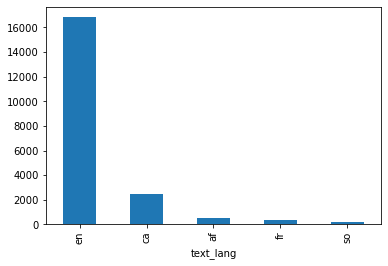

In [11]:
#Group tweets by language and list the top 10
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
squid_data.groupby(squid_data.text_lang).cleaned_tweet.count().sort_values(ascending=False).head(5).plot.bar()
plt.show()

In [12]:
print(squid_data['Sentiment'].value_counts())


Negative    12221
Positive     5551
Neutral      3701
Name: Sentiment, dtype: int64


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

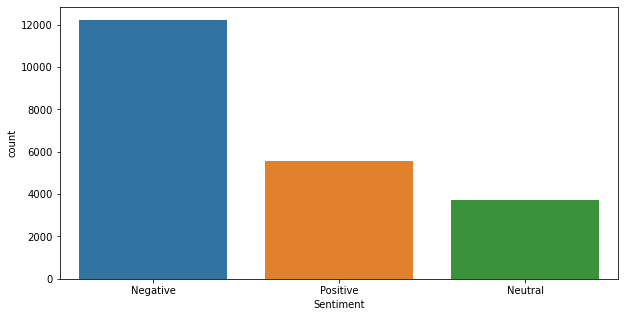

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x='Sentiment',data=squid_data)

In [15]:
 import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ayoba\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.lancaster import LancasterStemmer

nltk.LancasterStemmer
ls = LancasterStemmer()
lem = WordNetLemmatizer()
def lexicon_normalization(text):
    words = word_tokenize(text) 
    
    
    # 1- Stemming
    words_stem = [ls.stem(w) for w in words]
    
    # 2- Lemmatization
    words_lem = [lem.lemmatize(w) for w in words_stem]
    return words_lem


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ayoba\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
contraction = {'cause':'because',
              'aint': 'am not',
              'aren\'t': 'are not'}

def mapping_replacer(x,dic):
    for words in dic.keys():
        if ' ' + words + ' ' in x:
            x=x.replace(' '+ words +' ' ,' '+dic[words]+' ' )
    return x


In [19]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('\'','', text)
    
    return text

In [20]:
squid_data['cleaned_tweet']=squid_data['cleaned_tweet'].apply(lambda x: mapping_replacer(x, contraction))

In [21]:
squid_data['content']=squid_data['cleaned_tweet'].apply(lambda x: lexicon_normalization(x))

In [22]:
Positive_tweet = squid_data[squid_data['Sentiment']=='Positive']
negative_tweet = squid_data[squid_data['Sentiment']=='Negative']
neutral_tweet=squid_data[squid_data['Sentiment']=='Neutral']


In [23]:
# Spliting of sentiment into positive, negative and neutral column
squid_data['positive_tweet']=squid_data['Sentiment']=='Positive'
squid_data['negative_tweet']=squid_data['Sentiment']=='Negative'
squid_data['Neutral_tweet']=squid_data['Sentiment']=='Neutral'

In [86]:
squid_data

,Unnamed: 0,date,username,tweet,language,hashtags,near,cleaned_tweet,polarity,subjectivity,Sentiment,new_date,text_lang,content,positive_tweet,negative_tweet,Neutral_tweet
0,0,2023-04-14 14:58:58,kevinmatt123,Did y’all even watch the damn show???? They de...,en,[],Essex,did yall even watch the damn show they definit...,-0.010000,0.290000,Negative,2023-04-14,en,"[did, yal, ev, watch, the, damn, show, they, d...",False,True,False
1,1,2023-04-12 14:38:32,HolliFriedland,Is your website feeling a bit outdated? Updati...,en,"['socialsquids', 'websitedesign', 'webdevelopm...",Essex,is your website feeling a bit outdated updatin...,-0.400000,0.516667,Negative,2023-04-12,en,"[is, yo, websit, feel, a, bit, outd, upd, yo, ...",False,True,False
2,2,2023-04-12 11:44:46,bevcut,"@Cornet_Szn Squid games, red rose, dead to me",en,[],Essex,squid games red rose dead to me,0.133333,0.450000,Positive,2023-04-12,es,"[squid, gam, red, ro, dead, to, me]",True,False,False
3,3,2023-04-10 14:56:55,PinataPsychic,this game fucking sucks because they put in tw...,en,[],Essex,this game fucking sucks because they put in tw...,-0.245000,0.555000,Negative,2023-04-10,en,"[thi, gam, fuck, suck, becaus, they, put, in, ...",False,True,False
4,4,2023-04-09 04:13:13,epicrell,yo….where tf is this squid games season?,en,[],Essex,yowhere tf is this squid games season,0.000000,0.000000,Neutral,2023-04-09,en,"[yowh, tf, is, thi, squid, gam, season]",False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21468,22060,2022-10-22 08:16:29,yhebethuna,Nope It's 3rd best BBN and influencers party...,en,[],Cape town,nope it rd best bbn and influencers party af...,0.240000,0.356667,Positive,2022-10-22,en,"[nop, it, rd, best, bbn, and, influ, party, af...",True,False,False
21469,22061,2022-09-15 11:56:25,nathanstitus,"@TasAda123 When I did watch, I really enjoyed ...",en,[],Cape town,when i did watch i really enjoyed narcos stran...,0.200000,0.650000,Positive,2022-09-15,en,"[when, i, did, watch, i, real, enjoy, narco, s...",True,False,False
21470,22062,2022-08-27 17:35:43,omoiyaakeem,This is some intense Squid game 🥹BBNaija,en,[],Cape town,this is some intense squid game bbnaija,-0.100000,0.700000,Negative,2022-08-27,en,"[thi, is, som, intens, squid, gam, bbnaija]",False,True,False
21471,22063,2022-07-10 12:36:04,Matt_Maekela,Loved it so much didn't wanna finish reading i...,en,"['allagainstall', 'nathanallen', 'squidgame']",Cape town,loved it so much didnt wanna finish reading it...,0.450000,0.500000,Positive,2022-07-10,en,"[lov, it, so, much, didnt, wan, na, fin, read,...",True,False,False


In [87]:
# convering the positive,negative and neutral column to 0 and 1

In [24]:
squid_data['is positive']=squid_data['positive_tweet'].apply(lambda row: 1 if row == True else 0)
squid_data['is negative']=squid_data['negative_tweet'].apply(lambda row: 1 if row == True else 0)
squid_data['is neutral']=squid_data['Neutral_tweet'].apply(lambda row: 1 if row == True else 0)

In [25]:
squid_data

,Unnamed: 0,date,username,tweet,language,hashtags,near,cleaned_tweet,polarity,subjectivity,...,day,time,text_lang,content,positive_tweet,negative_tweet,Neutral_tweet,is positive,is negative,is neutral
0,0,2023-04-14 14:58:58,kevinmatt123,Did y’all even watch the damn show???? They de...,en,[],Essex,did yall even watch the damn show they definit...,-0.010000,0.290000,...,14,14,en,"[did, yal, ev, watch, the, damn, show, they, d...",False,True,False,0,1,0
1,1,2023-04-12 14:38:32,HolliFriedland,Is your website feeling a bit outdated? Updati...,en,"['socialsquids', 'websitedesign', 'webdevelopm...",Essex,is your website feeling a bit outdated updatin...,-0.400000,0.516667,...,12,14,en,"[is, yo, websit, feel, a, bit, outd, upd, yo, ...",False,True,False,0,1,0
2,2,2023-04-12 11:44:46,bevcut,"@Cornet_Szn Squid games, red rose, dead to me",en,[],Essex,squid games red rose dead to me,0.133333,0.450000,...,12,11,es,"[squid, gam, red, ro, dead, to, me]",True,False,False,1,0,0
3,3,2023-04-10 14:56:55,PinataPsychic,this game fucking sucks because they put in tw...,en,[],Essex,this game fucking sucks because they put in tw...,-0.245000,0.555000,...,10,14,en,"[thi, gam, fuck, suck, becaus, they, put, in, ...",False,True,False,0,1,0
4,4,2023-04-09 04:13:13,epicrell,yo….where tf is this squid games season?,en,[],Essex,yowhere tf is this squid games season,0.000000,0.000000,...,9,4,en,"[yowh, tf, is, thi, squid, gam, season]",False,False,True,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21468,22060,2022-10-22 08:16:29,yhebethuna,Nope It's 3rd best BBN and influencers party...,en,[],Cape town,nope it rd best bbn and influencers party af...,0.240000,0.356667,...,22,8,en,"[nop, it, rd, best, bbn, and, influ, party, af...",True,False,False,1,0,0
21469,22061,2022-09-15 11:56:25,nathanstitus,"@TasAda123 When I did watch, I really enjoyed ...",en,[],Cape town,when i did watch i really enjoyed narcos stran...,0.200000,0.650000,...,15,11,en,"[when, i, did, watch, i, real, enjoy, narco, s...",True,False,False,1,0,0
21470,22062,2022-08-27 17:35:43,omoiyaakeem,This is some intense Squid game 🥹BBNaija,en,[],Cape town,this is some intense squid game bbnaija,-0.100000,0.700000,...,27,17,en,"[thi, is, som, intens, squid, gam, bbnaija]",False,True,False,0,1,0
21471,22063,2022-07-10 12:36:04,Matt_Maekela,Loved it so much didn't wanna finish reading i...,en,"['allagainstall', 'nathanallen', 'squidgame']",Cape town,loved it so much didnt wanna finish reading it...,0.450000,0.500000,...,10,12,en,"[lov, it, so, much, didnt, wan, na, fin, read,...",True,False,False,1,0,0


In [26]:
squid_data.drop(['positive_tweet','negative_tweet','Neutral_tweet'],axis=1)

,Unnamed: 0,date,username,tweet,language,hashtags,near,cleaned_tweet,polarity,subjectivity,...,new_date,year,month,day,time,text_lang,content,is positive,is negative,is neutral
0,0,2023-04-14 14:58:58,kevinmatt123,Did y’all even watch the damn show???? They de...,en,[],Essex,did yall even watch the damn show they definit...,-0.010000,0.290000,...,2023-04-14,2023,4,14,14,en,"[did, yal, ev, watch, the, damn, show, they, d...",0,1,0
1,1,2023-04-12 14:38:32,HolliFriedland,Is your website feeling a bit outdated? Updati...,en,"['socialsquids', 'websitedesign', 'webdevelopm...",Essex,is your website feeling a bit outdated updatin...,-0.400000,0.516667,...,2023-04-12,2023,4,12,14,en,"[is, yo, websit, feel, a, bit, outd, upd, yo, ...",0,1,0
2,2,2023-04-12 11:44:46,bevcut,"@Cornet_Szn Squid games, red rose, dead to me",en,[],Essex,squid games red rose dead to me,0.133333,0.450000,...,2023-04-12,2023,4,12,11,es,"[squid, gam, red, ro, dead, to, me]",1,0,0
3,3,2023-04-10 14:56:55,PinataPsychic,this game fucking sucks because they put in tw...,en,[],Essex,this game fucking sucks because they put in tw...,-0.245000,0.555000,...,2023-04-10,2023,4,10,14,en,"[thi, gam, fuck, suck, becaus, they, put, in, ...",0,1,0
4,4,2023-04-09 04:13:13,epicrell,yo….where tf is this squid games season?,en,[],Essex,yowhere tf is this squid games season,0.000000,0.000000,...,2023-04-09,2023,4,9,4,en,"[yowh, tf, is, thi, squid, gam, season]",0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21468,22060,2022-10-22 08:16:29,yhebethuna,Nope It's 3rd best BBN and influencers party...,en,[],Cape town,nope it rd best bbn and influencers party af...,0.240000,0.356667,...,2022-10-22,2022,10,22,8,en,"[nop, it, rd, best, bbn, and, influ, party, af...",1,0,0
21469,22061,2022-09-15 11:56:25,nathanstitus,"@TasAda123 When I did watch, I really enjoyed ...",en,[],Cape town,when i did watch i really enjoyed narcos stran...,0.200000,0.650000,...,2022-09-15,2022,9,15,11,en,"[when, i, did, watch, i, real, enjoy, narco, s...",1,0,0
21470,22062,2022-08-27 17:35:43,omoiyaakeem,This is some intense Squid game 🥹BBNaija,en,[],Cape town,this is some intense squid game bbnaija,-0.100000,0.700000,...,2022-08-27,2022,8,27,17,en,"[thi, is, som, intens, squid, gam, bbnaija]",0,1,0
21471,22063,2022-07-10 12:36:04,Matt_Maekela,Loved it so much didn't wanna finish reading i...,en,"['allagainstall', 'nathanallen', 'squidgame']",Cape town,loved it so much didnt wanna finish reading it...,0.450000,0.500000,...,2022-07-10,2022,7,10,12,en,"[lov, it, so, much, didnt, wan, na, fin, read,...",1,0,0


In [27]:
df2 = squid_data.groupby(squid_data.near)['is positive','is negative','is neutral','Sentiment'].sum()
df2

C:\Users\ayoba\AppData\Local\Temp\ipykernel_3604\801924104.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2 = squid_data.groupby(squid_data.near)['is positive','is negative','is neutral','Sentiment'].sum()


,is positive,is negative,is neutral
near,,,
Abuja,2,8,2
Amsterdam,0,1,0
Berlin,7,5,1
Calif,5021,11336,3352
Cape town,3,3,0
Cardiff,9,9,4
Chicago,40,42,28
Dallas,14,17,12
Dublin,7,15,5


In [28]:
print(squid_data['is positive'].value_counts())

0    15922
1     5551
Name: is positive, dtype: int64


In [29]:
print('Number of tweets with positive sentiment', Positive_tweet['Sentiment'].count())
print('Number of tweets with negative sentiment', negative_tweet['Sentiment'].count())
print('Number of tweets with neutral sentiment', neutral_tweet['Sentiment'].count())

Number of tweets with positive sentiment 5551
Number of tweets with negative sentiment 12221
Number of tweets with neutral sentiment 3701


In [30]:
# Function to correct the spelling
def edits1(word):
    letters='abcdefghijklmnopqrstuvwxyz'
    splits=[(word[:i], word[i:]) for i in range(len(word)+1)]
    deletes=[L+R[1:] for L,R in splits if R]
    transposes=[L+R[1] +R[0] + R[2:] for L,R in splits if len(R)>1]
    replaces = [L+c+R[1:] for L,R in splits if R for c in letters]
    inserts = [L+c+ R for L,R in splits for c in letters]
    return set(deletes+transposes+replaces+inserts)
def edits2(word):
    return(e2 for e1 in edits1(word) for e2 in edits1(e1))

In [31]:
raw_text = [word for word_list in squid_data['content'] for word in word_list]

In [32]:
def words_unique(Sentiment,numwords,raw_words):
    '''
    Input:
        segment - Segment category (ex. 'Neutral');
        numwords - how many specific words do you want to see in the final result; 
        raw_words - list  for item in train_data[train_data.segments == segments]['temp_list1']:
    Output: 
        dataframe giving information about the name of the specific ingredient and how many times it occurs in the chosen cuisine (in descending order based on their counts)..

    '''
    allother = []
    for item in squid_data[squid_data.Sentiment != Sentiment]['content']:
        for word in item:
            allother .append(word)
    allother  = list(set(allother ))
    
    specificnonly = [x for x in raw_text if x not in allother]
    
    mycounter = Counter()
    
    for item in squid_data[squid_data.Sentiment == Sentiment]['content']:
        for word in item:
            mycounter[word] += 1
    keep = list(specificnonly)
    
    for word in list(mycounter):
        if word not in keep:
            del mycounter[word]
    
    Unique_words = pd.DataFrame(mycounter.most_common(numwords), columns = ['words','count'])
    
    return Unique_words

In [36]:
Unique_Negative= words_unique('Negative', 20, raw_text)
print("The top 20 unique words in Negative Tweets are:")
Unique_Negative.style.background_gradient(cmap='Reds')

The top 20 unique words in Negative Tweets are:


,words,count
0,dutch,55
1,funkovers,22
2,amyb,19
3,opp,16
4,instock,13
5,guav,13
6,selfdoubt,11
7,glen,10
8,fox,10
9,chess,10


In [37]:
import plotly.express as px
fig = px.treemap(Unique_Negative, path=['words'], values='count',title='Tree Of Unique Words in Negative sentiment tweets')
fig.show()

C:\Users\ayoba\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [39]:
Unique_Positive= words_unique('Positive', 20, raw_text)
print("The top 20 unique words in Positive Tweets are:")
Unique_Positive.style.background_gradient(cmap='Greens')


The top 20 unique words in Positive Tweets are:


,words,count
0,excel,22
1,proud,16
2,hac,9
3,megast,8
4,roe,7
5,rout,6
6,carrd,6
7,superb,5
8,nerv,5
9,outstand,5


In [40]:
import plotly.express as px
fig = px.treemap(Unique_Positive, path=['words'], values='count',title='Tree Of Unique Words in Positive sentiment tweets')
fig.show()

C:\Users\ayoba\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [26]:
pip install WordCloud

In [56]:
from wordcloud import WordCloud,STOPWORDS

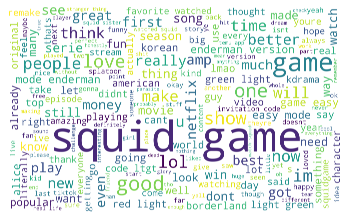

In [65]:
df1 = squid_data[squid_data['Sentiment']=='Positive']
words = ' '.join(df1['cleaned_tweet'].astype(str))
cleaned_word = ' '.join([word for word in words.split() if not word.startswith('@')])

wordcloud = WordCloud(background_color='white',stopwords=STOPWORDS,
                      width=9000, height=5500).generate(''.join(cleaned_word))
plt.imshow(wordcloud,interpolation='bilinear')
#plt.figure(figsize=(6,6))
plt.axis('off')
plt.show()

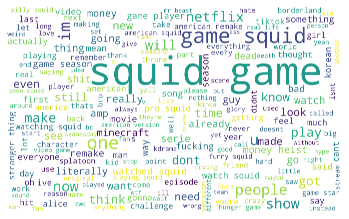

In [66]:
df2 = squid_data[squid_data['Sentiment']=='Negative']
words = ' '.join(df2['cleaned_tweet'].astype(str))
cleaned_word = ' '.join([word for word in words.split() if not word.startswith('@')])

wordcloud = WordCloud(background_color='white',stopwords=STOPWORDS,
                      width=9000, height=5500).generate(''.join(cleaned_word))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [79]:
uk_squid = squid_data.to_excel('new_cleaned_data_allsquid.xlsx')